In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset
data_path = "../data/raw/building_energy_data.csv"
df = pd.read_csv(data_path)

In [8]:
# Display first few rows
display(df.head())

,BuildingID,BuildingSize,BuildingAge,InsulationType,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,RenewableEnergySource
0,B0001,910,51,Poor,35.347140,14.848393,136.438375,23,NaN
1,B0002,3822,54,Fair,-3.381381,64.831627,270.517752,10,Solar
2,B0003,3142,24,Poor,19.650725,11.997298,310.402460,11,NaN
3,B0004,516,25,Good,19.956029,23.714734,70.034617,6,Solar
4,B0005,4476,71,Good,7.673037,46.286320,412.368667,6,NaN


In [9]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BuildingID             1000 non-null   object 
 1   BuildingSize           1000 non-null   int64  
 2   BuildingAge            1000 non-null   int64  
 3   InsulationType         1000 non-null   object 
 4   Temperature            1000 non-null   float64
 5   Humidity               1000 non-null   float64
 6   EnergyConsumption      1000 non-null   float64
 7   SupplierLeadTime       1000 non-null   int64  
 8   RenewableEnergySource  679 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [10]:
# Summary statistics
display(df.describe())

,BuildingSize,BuildingAge,Temperature,Humidity,EnergyConsumption,SupplierLeadTime
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2578.250000,50.149000,15.902084,49.384810,296.190255,14.646000
std,1390.960625,28.855874,14.235700,23.318803,162.629420,8.362692
min,53.000000,1.000000,-9.977861,10.014922,27.606296,1.000000
25%,1389.500000,26.000000,4.136905,28.924968,166.374887,8.000000
50%,2647.000000,49.000000,16.586662,49.393253,273.275106,14.500000
75%,3693.250000,75.250000,28.069674,70.030764,403.408926,22.000000
max,4998.000000,99.000000,39.977196,89.809826,742.628282,29.000000


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

RenewableEnergySource    321
dtype: int64

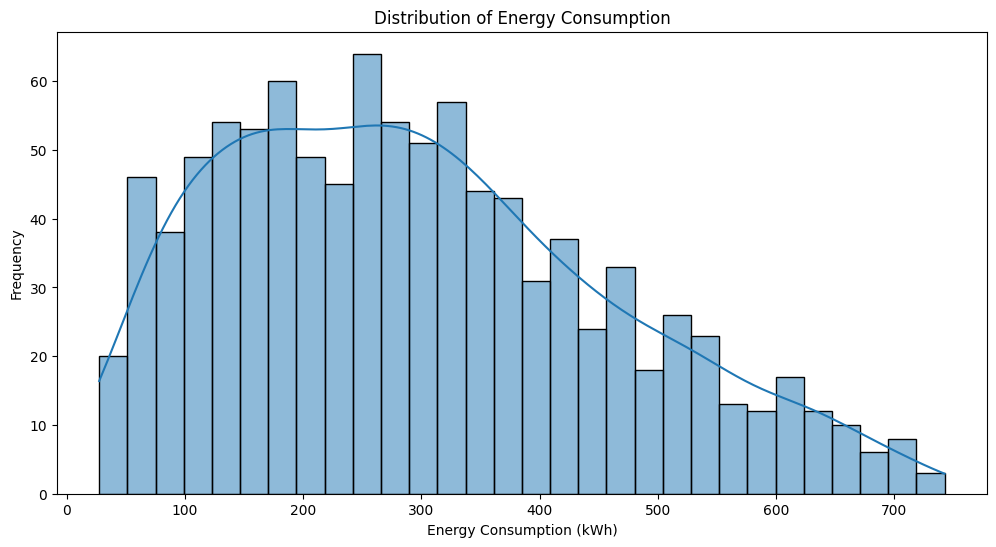

In [12]:
# Distribution of Energy Consumption
plt.figure(figsize=(12, 6))
sns.histplot(df['EnergyConsumption'], bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

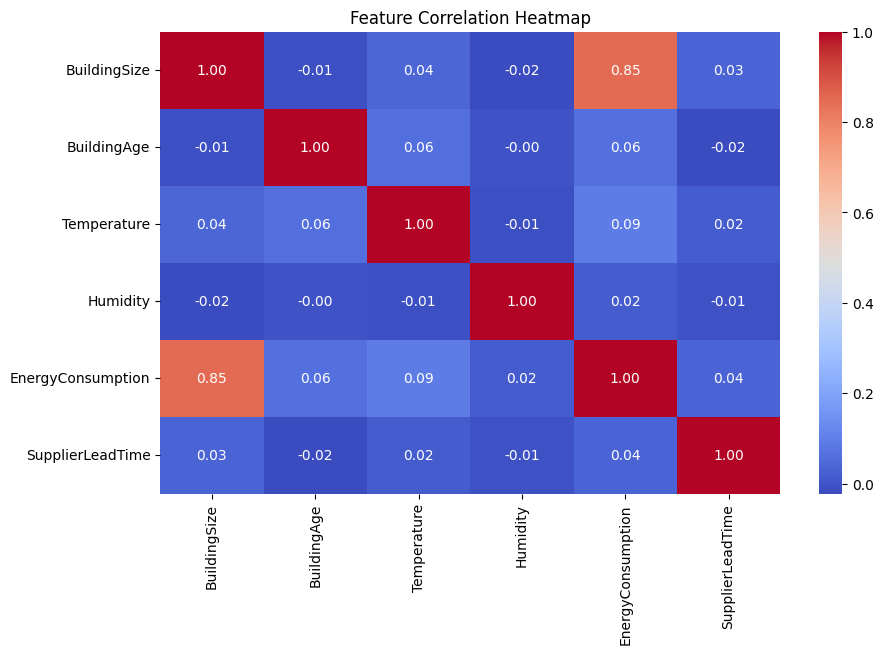

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

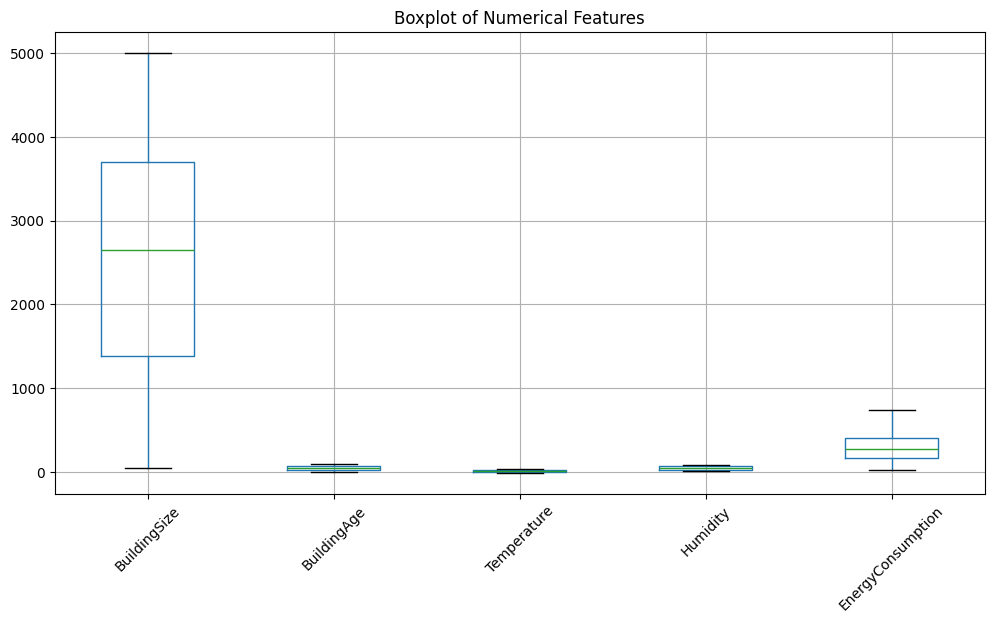

In [16]:
# Box plots for numerical features
numerical_features = ['BuildingSize', 'BuildingAge', 'Temperature', 'Humidity', 'EnergyConsumption']
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

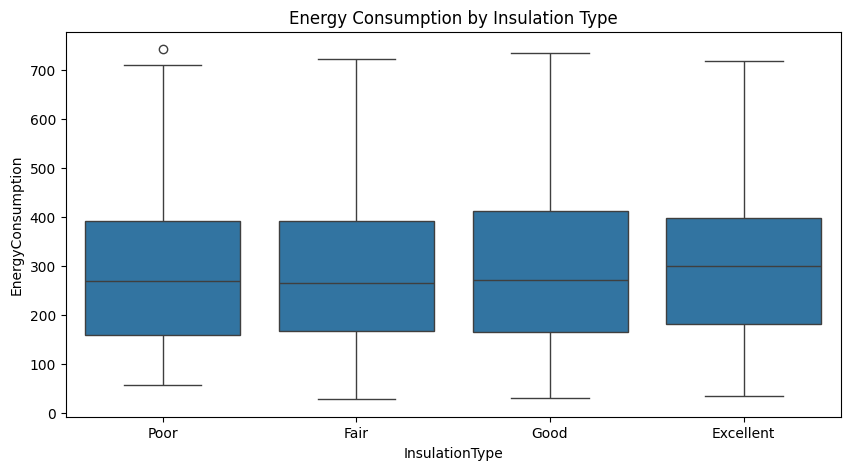

In [17]:
# Energy consumption by insulation type
plt.figure(figsize=(10, 5))
sns.boxplot(x='InsulationType', y='EnergyConsumption', data=df)
plt.title("Energy Consumption by Insulation Type")
plt.show()

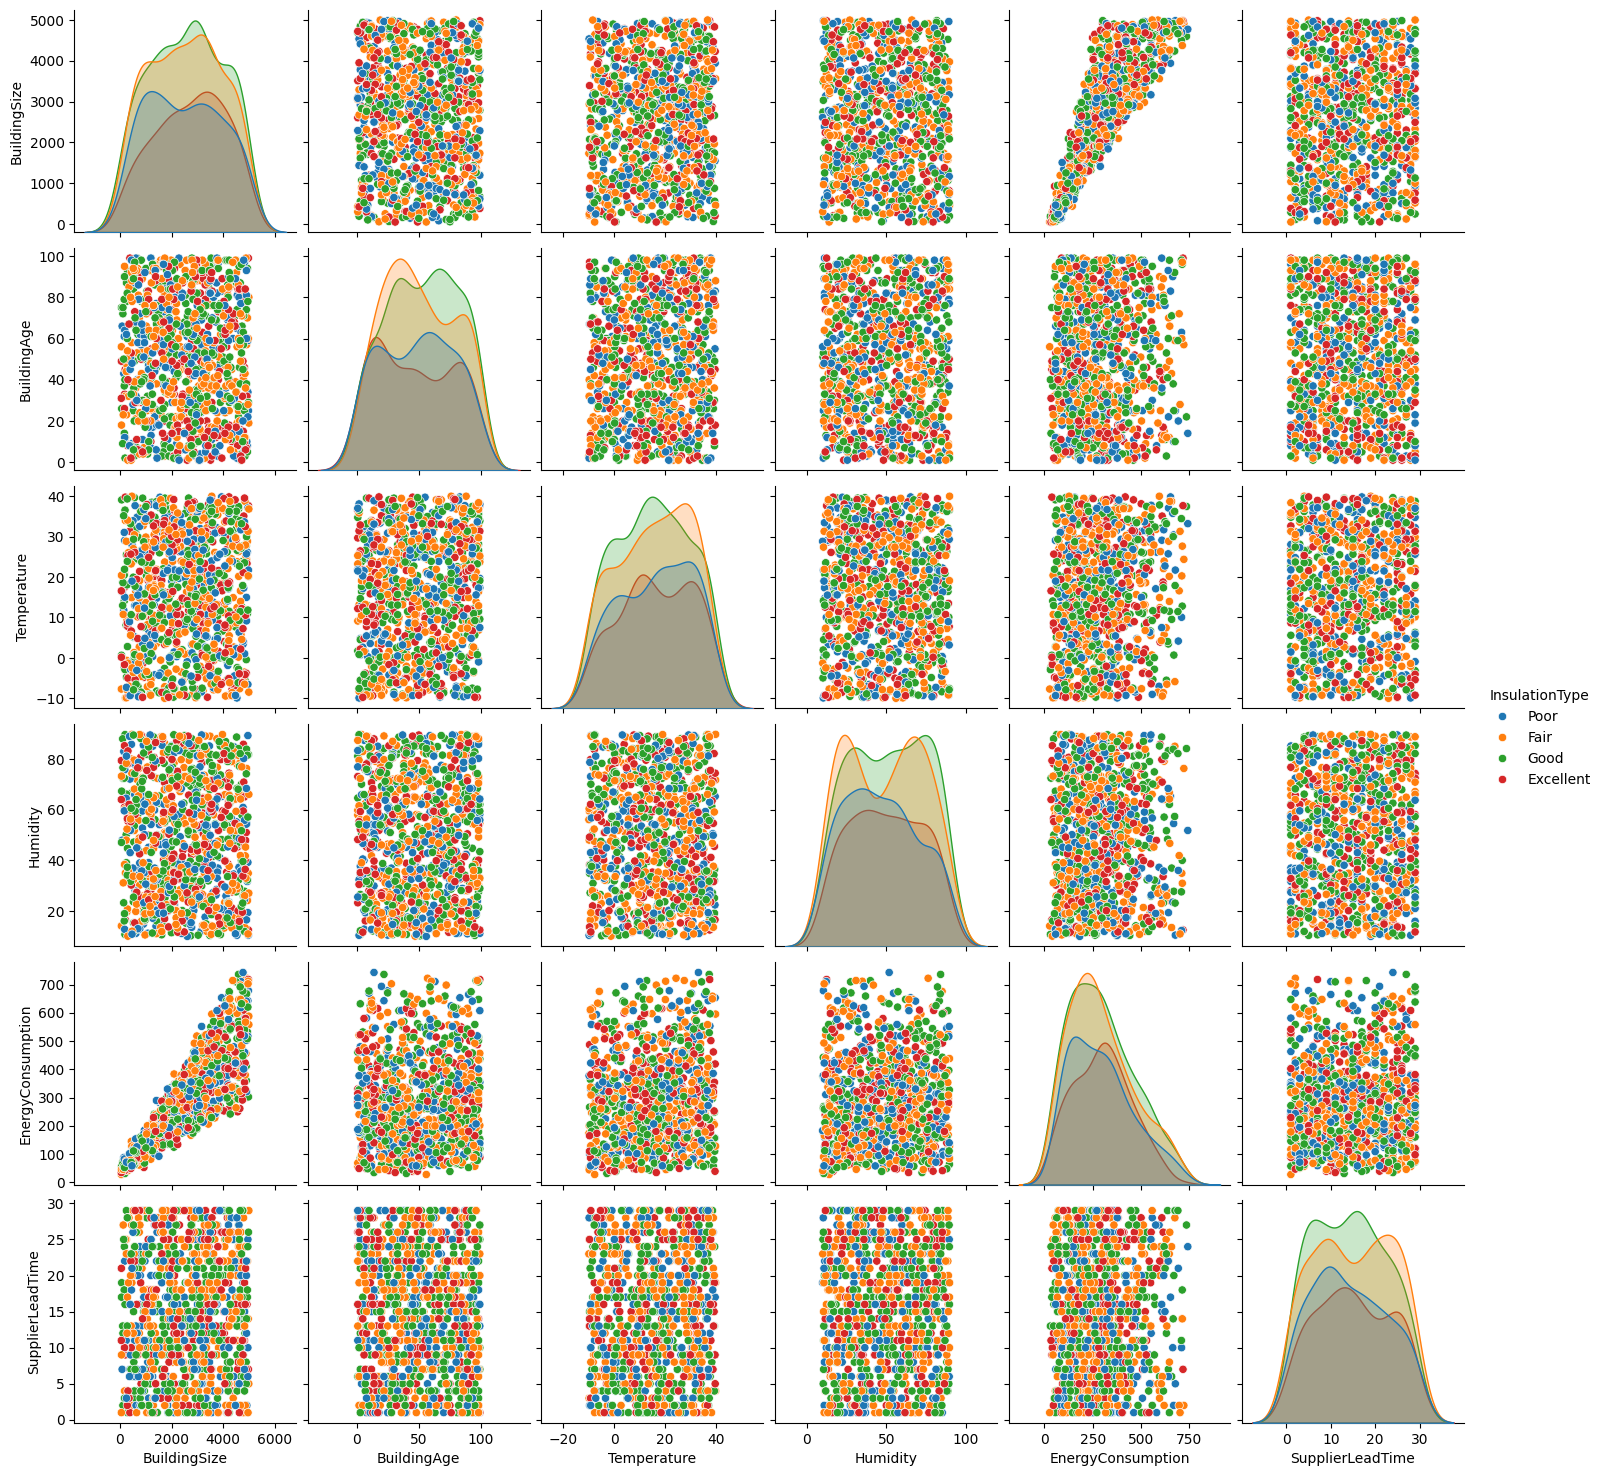

In [18]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde', hue='InsulationType')
plt.show()

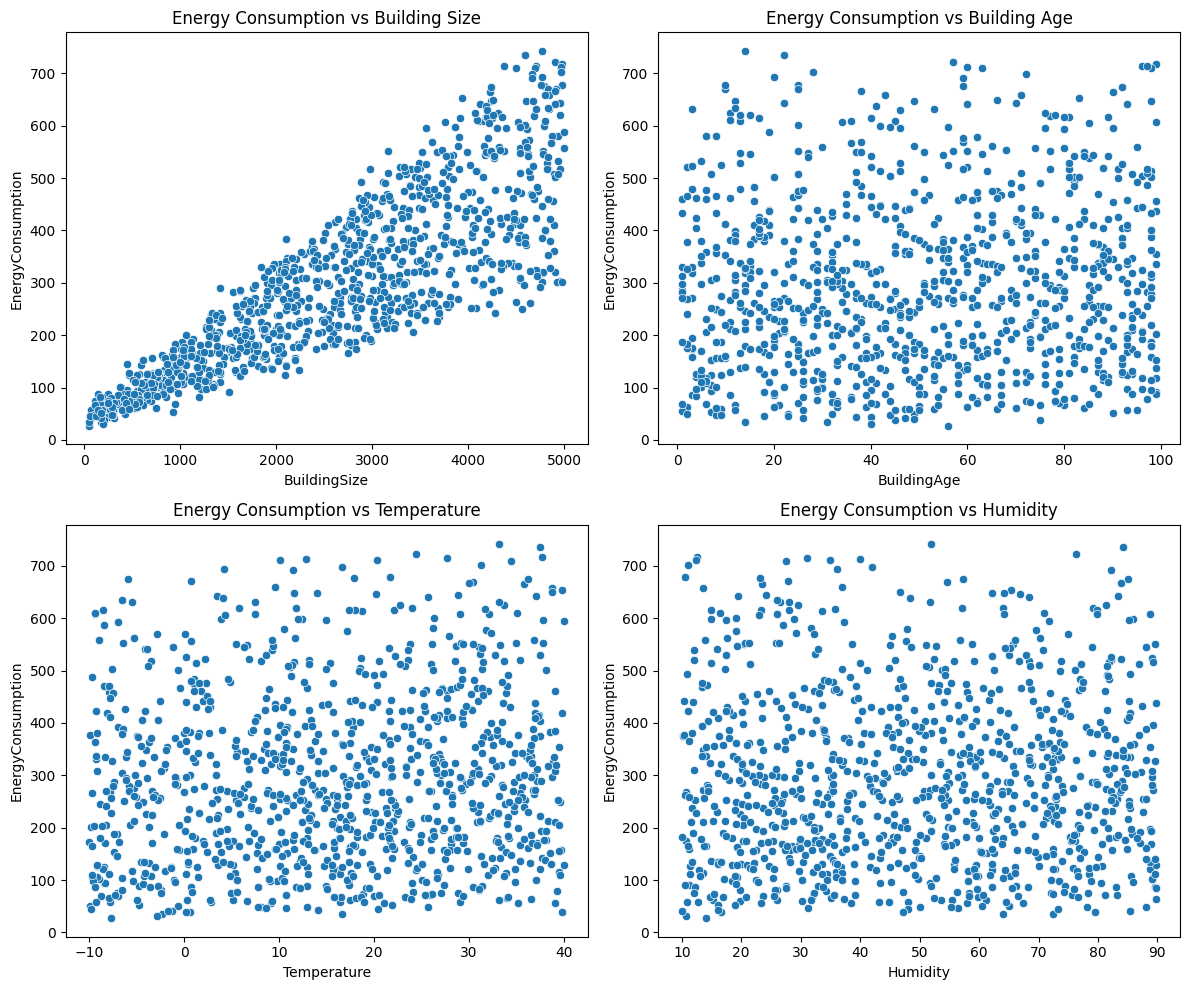

In [19]:
# Scatter plots for relationships between numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df['BuildingSize'], y=df['EnergyConsumption'], ax=axes[0, 0])
axes[0, 0].set_title("Energy Consumption vs Building Size")

sns.scatterplot(x=df['BuildingAge'], y=df['EnergyConsumption'], ax=axes[0, 1])
axes[0, 1].set_title("Energy Consumption vs Building Age")

sns.scatterplot(x=df['Temperature'], y=df['EnergyConsumption'], ax=axes[1, 0])
axes[1, 0].set_title("Energy Consumption vs Temperature")

sns.scatterplot(x=df['Humidity'], y=df['EnergyConsumption'], ax=axes[1, 1])
axes[1, 1].set_title("Energy Consumption vs Humidity")

plt.tight_layout()
plt.show()

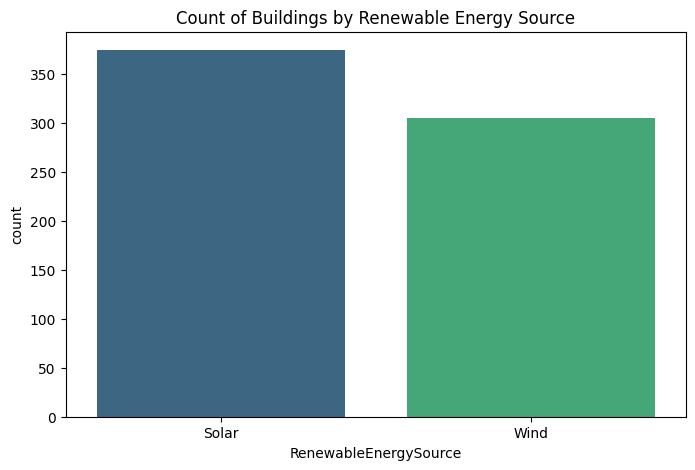

In [ ]:
# Count plot for Renewable Energy Source
plt.figure(figsize=(8, 5))
sns.countplot(x='RenewableEnergySource', data=df, hue='RenewableEnergySource', palette='viridis', legend=False)
plt.title("Count of Buildings by Renewable Energy Source")
plt.show()

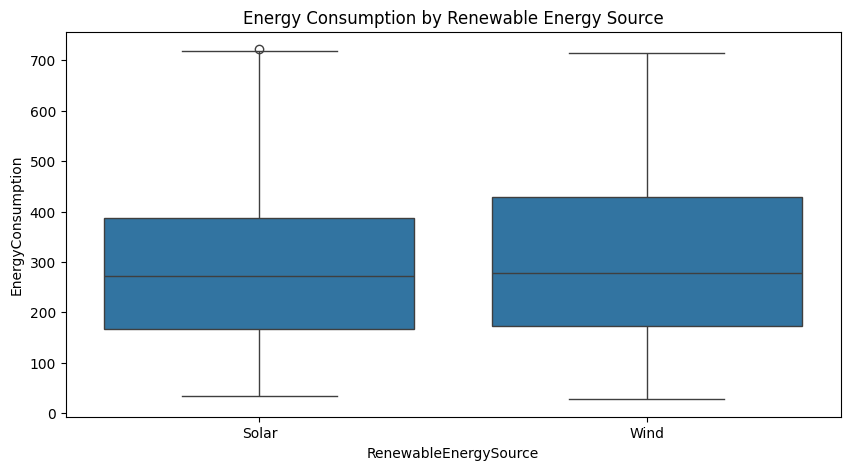

In [22]:
# Energy consumption by Renewable Energy Source
plt.figure(figsize=(10, 5))
sns.boxplot(x='RenewableEnergySource', y='EnergyConsumption', data=df)
plt.title("Energy Consumption by Renewable Energy Source")
plt.show()

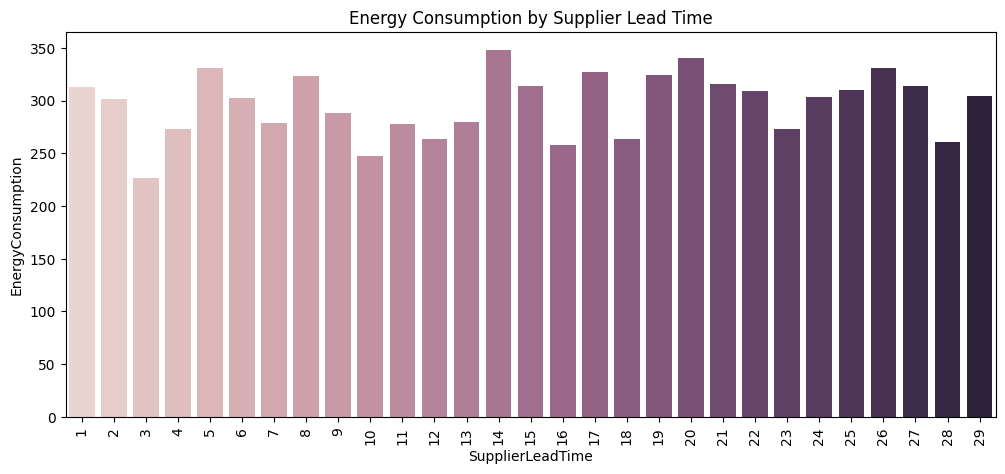

In [25]:
# Energy consumption by Supplier Lead Time
plt.figure(figsize=(12, 5))
sns.barplot(x='SupplierLeadTime', y='EnergyConsumption', data=df, errorbar=None, hue='SupplierLeadTime', legend=False)
plt.title("Energy Consumption by Supplier Lead Time")
plt.xticks(rotation=90)
plt.show()